# <center> 👉 class_09_1 IP » _Feature / Corner Detection  & Convex Hull- Harris & Shi-Tomasi Corner Detection, Convex Hull, Approx Poly, Moment_ </center>  
https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/?ref=lbp  
https://bkshin.tistory.com/entry/OpenCV-20      

## Understanding Features  
we will just try to understand what are features, why are they important, why corners are important etc.  

Most of you will have played the jigsaw puzzle games.   
- You get a lot of small pieces of an image, where you need to assemble them correctly to form a big real image.  

The question is, how you do it?   
What about the projecting the same theory to a computer program so that computer can play jigsaw puzzles?  
The answer is, we are looking for specific patterns or specific features which are unique, can be easily tracked and can be easily compared.  

* For example, take below image:

<img src= './images/feature_building.jpg' width=400 height=600>

The image is very simple.   
- At the top of image, six small image patches are given.   
- Question for you is to find the exact location of these patches in the original image.  

* A and B are flat surfaces and they are spread over a lot of area.   
- It is difficult to find the exact location of these patches.  
* C and D are much more simple.   
- They are edges of the building.   
- You can find an approximate location, but exact location is still difficult.   
- This is because the pattern is same everywhere along the edge.   
* At the edge, however, it is different.   
- An edge is therefore better feature compared to flat area, but not good enough (It is good in jigsaw puzzle for comparing continuity of edges).  
* Finally, E and F are some corners of the building.  
- And they can be easily found.   
- Because at the corners, wherever you move this patch, it will look different.   
- So they can be considered as good features.   
- So now we move into simpler (and widely used image) for better understanding.  

<img src= './images/feature_simple.png' width=400 height=600>

Just like above, the blue patch is flat area and difficult to find and track.   
- Wherever you move the blue patch it looks the same.  
The black patch has an edge.   
- If you move it in vertical direction (i.e. along the gradient) it changes.  
Moved along the edge (parallel to edge), it looks the same.  
And for red patch, it is a corner.  
Wherever you move the patch, it looks different, means it is unique.  
So basically, __corners are considered to be good features in an image.__ 
- (Not just corners, in some cases blobs are considered good features).  

So now we answered our question, "what are these features?".  
But next question arises. How do we find them? Or how do we find the corners?.  
We answered that in an intuitive way, i.e., 
- look for the regions in images which have maximum variation when moved (by a small amount) in all regions around it.  
So **finding these image features is called Feature Detection.**  

Once you have found it, you should be able to find the same in the other images.  
How is this done? We take a region around the feature, we explain it in our own words, like "_upper part is blue sky, lower part is region from a building, on that building there is glass etc_" and you search for the same area in the other images.  
Basically, you are describing the feature.   
__Similarly, a computer also should describe the region around the feature so that it can find it in other images.__ **So called description is called Feature Description**.  

Once you have the features and its description, you can find same features in all images and align them, stitch them together or do whatever you want.  

So in this module, we are looking to different algorithms in OpenCV to find features, describe them, match them etc.

# Keypoints (이미지 특징점)   

An image feature keypoints literally means a __characteristic part of an image.__  
When checking whether images match each other, the characteristic parts of each image are compared.  
In other words, keypoints are used when matching images.  
Usually, the part that becomes the feature point is __the edge or corner of the object.__  
Therefore, most feature point detection is based on corner detection.  

        이미지 특징점이란 말 그대로 이미지에서 특징이 되는 부분을 의미합니다.   
        이미지끼리 서로 매칭이 되는지 확인을 할 때 각 이미지에서의 특징이 되는 부분끼리 비교를 합니다.   
        즉, 이미지 매칭 시 사용하는 것이 바로 특징점(Keypoints)입니다.    
        보통 특징점이 되는 부분은 물체의 모서리나 코너입니다.   
        그래서 대부분의 특징점 검출을 코너 검출을 바탕으로 하고 있습니다.

The corner detection algorithm precisely refers to a point (feature) that is good for tracking as a corner.

        코너 검출 알고리즘은 정확하게는 트래킹(Tracking) 하기 좋은 지점(특징)을 코너라 부릅니다.

## ▶ What is a Corner?  

A corner can be interpreted as __the junction of two edges (where an edge is a sudden change in image brightness).__  
- Here the basic intuition is that corners can be detected by looking for significant change in all direction.  
- We consider a small window on the image then scan the whole image, looking for corners.  

<img src='./images/corner11.png' width=400 height=200>

* Shifting this small window in any direction would result in a large change in appearance, if that particular window happens to be located on a corner.  

<img src='./images/corner21.png' width=400 height=200> 

* Flat regions will have no change in any direction.  
<img src='./images/corner3.png' width=400 height=200> 

*If there’s an edge, then there will be no major change along the edge direction.  

## ▶ Detect corner of an image   

~ Syntax:  

- **cv2.goodFeaturesToTrack(gray_img, maxc, Q, minD)**

~ Parameters :  
    
>- gray_img – Grayscale image with integral values
>- maxc – Maximum number of corners we want(give negative value to get all the corners)
>- Q – Quality level parameter(preferred value=0.01)
>- minD – Minimum distance(preferred value=10)    

- **corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 5, blockSize=3, useHarrisDetector=True, k=0.03)**    

        cv2.goodFeaturesToTrack(입력 이미지, 코너 최댓값, 코너 품질, 최소 거리, 마스크, 블록 크기, 해리스 코너 검출기 유/무, 해리스 코너 계수)  

~ Parameters:  

* gray : 입력 이미지는 8비트 또는 32비트의 단일 채널 이미지를 사용합니다.  
* 코너 최댓값 100 : 은 검출할 최대 코너의 수를 제한합니다. 코너 최댓값보다 낮은 개수만 반환합니다.  
* 코너 품질 0.01 : 은 반환할 코너의 최소 품질을 설정합니다. 코너 품질은 0.0 ~ 1.0 사이의 값으로 할당할 수 있으며, 일반적으로 0.01 ~ 0.10 사이의 값을 사용합니다.  
* 최소 거리 5 : 는 검출된 코너들의 최소 근접 거리를 나타내며, 설정된 최소 거리 이상의 값만 검출합니다.  
* 마스크는 입력 이미지와 같은 차원을 사용하며, 마스크 요솟값이 0인 곳은 코너로 계산하지 않습니다.  
* blockSize : 블록 크기는 코너를 계산할 때, 고려하는 코너 주변 영역의 크기를 의미합니다.  
* useHarrisDetector=True : 해리스 코너 검출기 유/무는 해리스 코너 검출 방법 사용 여부를 설정합니다.  
* k : 해리스 코너 계수는 해리스 알고리즘을 사용할 때 할당하며 해리스 대각합의 감도 계수를 의미합니다.  
>- 코너 품질에서 가장 좋은 코너의 강도가 1000이고, 코너 품질이 0.01이라면 10 이하의 코너 강도를 갖는 코너들은 검출하지 않습니다.  
>- 최소 거리의 값이 5일 경우, 거리가 5 이하인 코너점은 검출하지 않습니다.          

- Example (Original Image) :
<img src='./images/corner1.png' width=400 height=200>

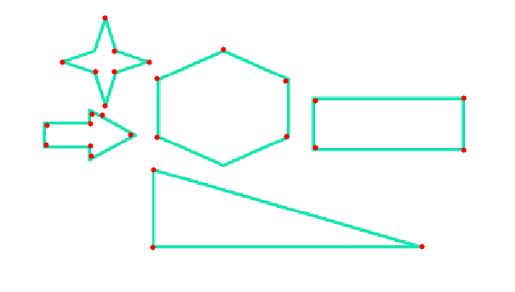

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
  
img = cv2.imread('./images/corner1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# detect corners with the goodFeaturesToTrack function.
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
corners = np.int0(corners)
  
# we iterate through each corner, making a circle at each point that we think is a corner.
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)
    
plt.imshow(img)
plt.axis('off')
plt.show()

## ▶ Harris Corner Detection 

Harris Corner detection algorithm was developed to __identify the internal corners of an image.__    
- The corners of an image are basically identified as the regions in which there are __variations in large intensity of the gradient in all possible dimensions and directions.__    
- Corners extracted can be a part of the image features, which can be matched with features of other images, and can be used to extract accurate information.  
- __Harris Corner Detection__ is a method to __extract the corners from the input image and to extract features from the input image.__ 


 Harris corner detection measures the change in slope of the boundary value while detecting the boundary value using Sobel differentiation, and determines that the change significantly changes in the vertical, horizontal, or diagonal directions as a corner.

    - 해리스 코너 검출은 소벨(Sobel) 미분으로 경곗값을 검출하면서 경곗값의 경사도 변화량을 측정하여 변화량이 수직, 수평, 대각선 방향으로 크게 변화하는 것을 코너로 판단합니다.  

<img src='./images/corner_all.png' width=600 height=400>

1. Determine which windows produce very large variations in intensity when moved in both x and y directions.
2. With each such window found, a score r is computed.
3. After applying a threshold to this score, important corners are selected and marked

~ Syntax: 
    
>**cv2.cornerHarris(src, dest, blockSize, kSize, freeParameter, borderType)**

~ Parameters: 
> - src – Input Image (Single-channel, 8-bit or floating-point)   
>- dest – Image to store the Harris detector responses. Size is same as source image   
>- blockSize – Neighborhood size ( for each pixel value blockSize * blockSize neighbourhood is considered )   
>- ksize – Aperture parameter for the Sobel() operator   
>- freeParameter – Harris detector free parameter   
>- borderType – Pixel extrapolation method ( the extrapolation mode used returns the coordinate of the pixel corresponding to the specified extrapolated pixel )  

    * src: 입력 이미지, 그레이 스케일
    * blockSize: 이웃 픽셀 범위
    * ksize: 소벨 미분 필터 크기
    * k(optional): 코너 검출 상수 (0.04~0.06)
    * dst(optional): 코너 검출 결과 (src와 같은 크기의 1 채널 배열, 변화량의 값, 지역 최대 값이 코너점을 의미)
    * borderType(optional): 외곽 영역 보정 형식  

~ Example:        

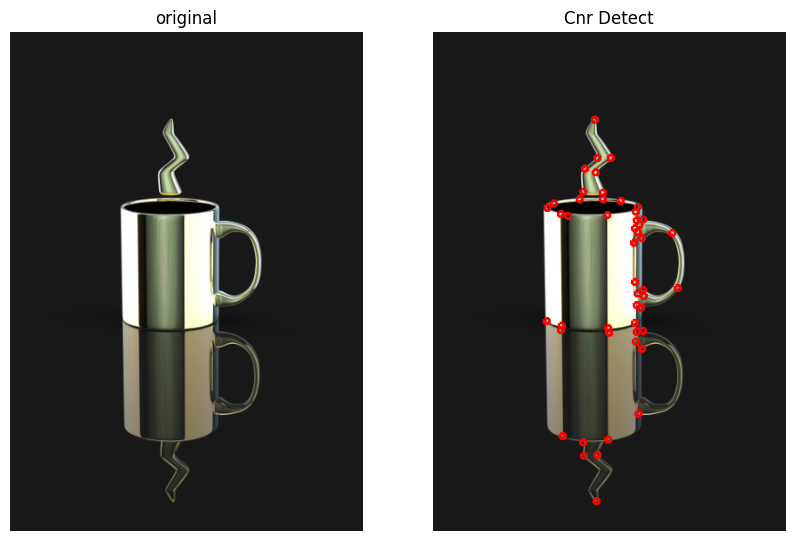

In [2]:
import cv2
from matplotlib import pyplot as plt

src = cv2.imread("./images/practice_img/mug.png")
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 5, blockSize=3, useHarrisDetector=True, k=0.03)

for i in corners:
    i=i.astype(int)
#     print(i[0])
    cv2.circle(dst, tuple(i[0]), 3, (0, 0, 255), 2)

# cv2.imshow("dst", dst)

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Cnr Detect')

plt.show()

<Figure size 1500x1000 with 0 Axes>

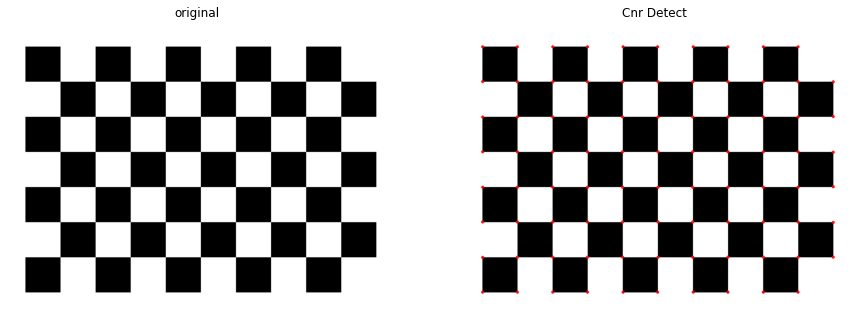

In [10]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=100)

src = cv2.imread('./images/chessboard.png')
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 5, blockSize=3, useHarrisDetector=True, k=0.03)

for i in corners:
    i=i.astype(int)
#     print(i[0])
    cv2.circle(dst, tuple(i[0]), 4, (0, 0, 255), 3)

cv2.imshow("dst", dst)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Cnr Detect')

plt.show()

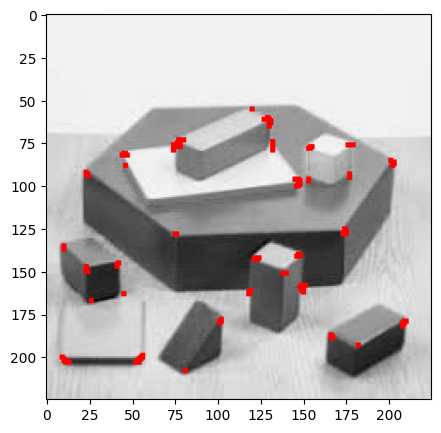

In [3]:
# Python program to illustrate corner detection with Harris Corner Detection Method
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 5), dpi=100)

image = cv2.imread('./images/cnr_detect_pic.jpeg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)
dest = cv2.cornerHarris(img_gray, 2, 5, 0.07)
dest = cv2.dilate(dest, None)
image[dest > 0.01 * dest.max()]=[0, 0, 255]

cv2.imshow('Image with Borders', image)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show() # very hard to find red dot

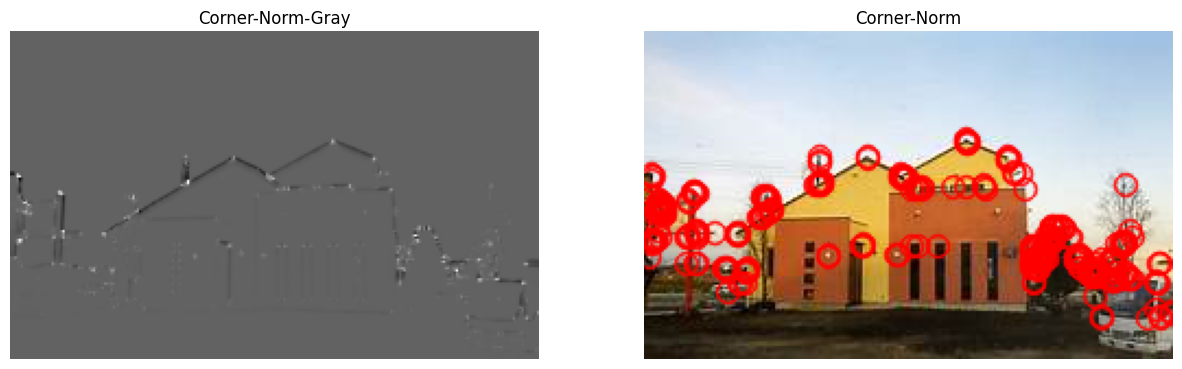

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./images/cnr_det_ex.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corner = cv2.cornerHarris(gray, 2, 3, 0.04) 
coord = np.where(corner > 0.1* corner.max())
coord = np.stack((coord[1], coord[0]), axis=-1)

for x, y in coord:
    cv2.circle(img, (x,y), 5, (0,0,255), 1, cv2.LINE_AA)

corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
merged = np.hstack((corner_norm, img))
# cv2.imshow('Harris Corner', merged)
# cv2.waitKey()
# cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(corner_norm, cmap='gray'), axs[0].axis('off'), axs[0].set_title('Corner-Norm-Gray')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Corner-Norm')

plt.show()

## ▶ Shi-Tomasi Corner Detection  

There is also an algorithm that further __improves Harris corner detection.__
This is a __Si-Tomas corner detection__> method, and OpenCV provides it as the following function.  

    해리스 코너 검출을 좀 더 개선한 알고리즘도 있습니다.   
    시-토마시 코너 검출 방법인데, 이를 OpenCV에서는 다음 함수로 제공합니다.

Shi-Tomasi Corner Detection was published by J.Shi and C.Tomasi in their paper ‘Good Features to Track‘. 

**cv2.goodFeaturesToTrack()** method finds N strongest corners in the image by Shi-Tomasi method.   

~ Syntax:  
    
> **cv2.goodFeaturesToTrack(gray_img, maxCorners, qualityLevel, minDistance[, corners[, mask[, blockSize[, useHarrisDetector[, k]]]]])**  

~ Parameters:  
    
>- gray_img – Grayscale image with integral values
>- maxCorners – Maximum number of corners we want(give negative value to get all the corners)
>- qualityLevel – Quality level parameter(preferred value=0.01)
>- minDistance – Minimum distance(preferred value=10)   
>- corners – Output vector of detected corners.
>- mask – Optional region of interest. 
>- blockSize – Size of an average block for computing a derivative covariation matrix over each pixel neighborhood. 
>- useHarrisDetector – Set this to True if you want to use Harris Detector with this function.
>- k – Free parameter of the Harris detector.  

    * img: 입력 이미지
    * maxCorners: 얻고 싶은 코너의 개수, 강한 것 순으로
    * qualityLevel: 코너로 판단할 스레시홀드 값
    * minDistance: 코너 간 최소 거리
    * corners: 코너 검출 좌표 결과, N x 1 x 2 크기의 배열, 실수 값이므로 정수로 변형 필요
    * mask(optional): 검출에 제외할 마스크
    * blockSize(optional)=3: 코너 주변 영역의 크기
    * useHarrisDetector(optional)=False: 코너 검출 방법 선택 (True: 해리스 코너 검출 방법, False: 시와 토마시 코너 검출 방법)
    * k(optional): 해리스 코너 검출 방법에 사용할 k 계수

If True is passed to the useHarrisDetector parameter, Harris corner detection is performed.
If you pass the default value of False, Si-Tomasi corners will be detected.  

useHarrisDetector 파라미터에 True를 전달하면 해리스 코너 검출을 하고,  
디폴트 값인 False를 전달하면 시-토마시 코너 검출을 합니다.

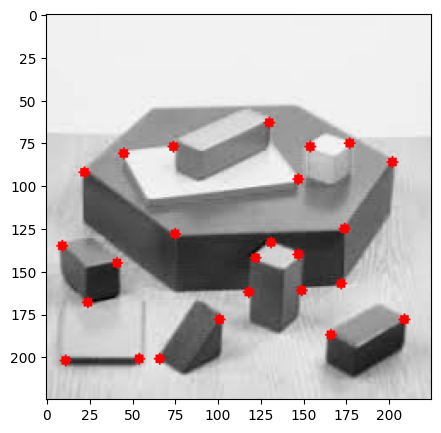

In [5]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 5), dpi=100)
img = cv2.imread('./images/cnr_detect_pic.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img)
plt.show()

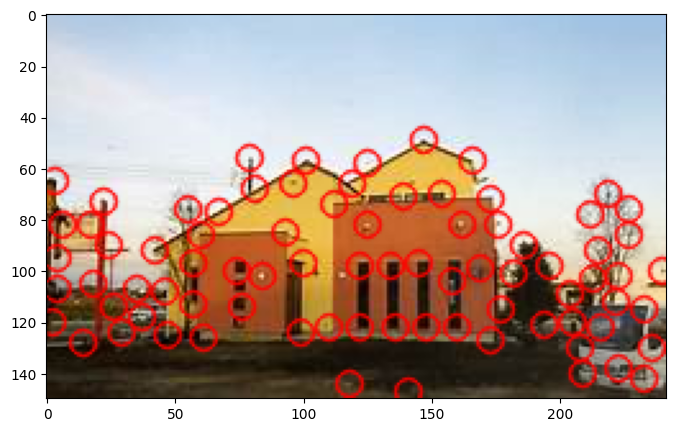

In [7]:
# 시 토마시 코너 검출 (corner_goodFeature.py)

import cv2
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 5), dpi=100)

img = cv2.imread("./images/cnr_det_ex.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 80, 0.01, 10) 
corners = np.int32(corners)  # Convert real coordinates to integer coordinates

for corner in corners:
    x, y = corner[0]
    cv2.circle(img, (x, y), 5, (0,0,255), 1, cv2.LINE_AA)

# cv2.imshow('Corners', img)
# cv2.waitKey()
# cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

As you can see, more corners were detected than Harris corners were detected.

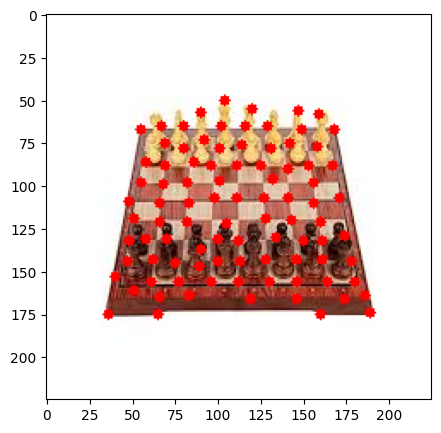

In [6]:
# Python program to illustrate corner detection with Shi-Tomasi Detection Method
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

figure(figsize=(8, 5), dpi=100)

img = plt.imread('./images/chess.jpeg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10) # detect 100 best corners w/Shi-Tomasi corner detection
corners = np.int0(corners)
  
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, (255, 0, 0), -1)

# resulting image
plt.imshow(img)
plt.show()